## Imports and Setup

In [1]:
import os 
os.chdir('/home/itingzon.unicef/giga')
from utils import plot_utils
from utils import config_utils

%load_ext autoreload
%autoreload 2

## Load Config Files

In [2]:
iso_code = "SEN"
data_config_file = os.path.join(os.getcwd(), "configs/data_configs/data_config_ISO_AF.yaml")
model_config_file = os.path.join(os.getcwd(), "configs/cnn_configs/convnext_large_v01.yaml")
data_config = config_utils.load_config(data_config_file)
model_config = config_utils.load_config(model_config_file)

## Load Data

In [3]:
master = plot_utils.read_file(iso_code, model_config, source="master")
preds = plot_utils.read_file(iso_code, model_config, source="preds")
preds.head(2)

prob     UID   sum  group      ADM1         ADM2        ADM3  \
0  0.982964   44707  38.0   7282   Sedhiou      Sedhiou  Djibabouya   
1  0.982403  131374  28.0   9804  Kaffrine  Malem Hodar       Sagna   

                 PUID  prob_cal  distance_to_nearest_master  \
0       Sedhiou_44707  0.983596                   31.647240   
1  Malem Hodar_131374  0.982973                   28.146039   

                         MUID  distance_to_nearest_osm_overture  \
0  UNICEF-SEN-SCHOOL-00001558                       8003.396762   
1  UNICEF-SEN-SCHOOL-00003603                      17292.290044   

                      SUID                    geometry  
0  OSM-SEN-SCHOOL-00000457  POINT (-15.87026 12.86348)  
1  OSM-SEN-SCHOOL-00000456  POINT (-15.15179 14.00546)

## Plot Charts for Post-prediction Analysis

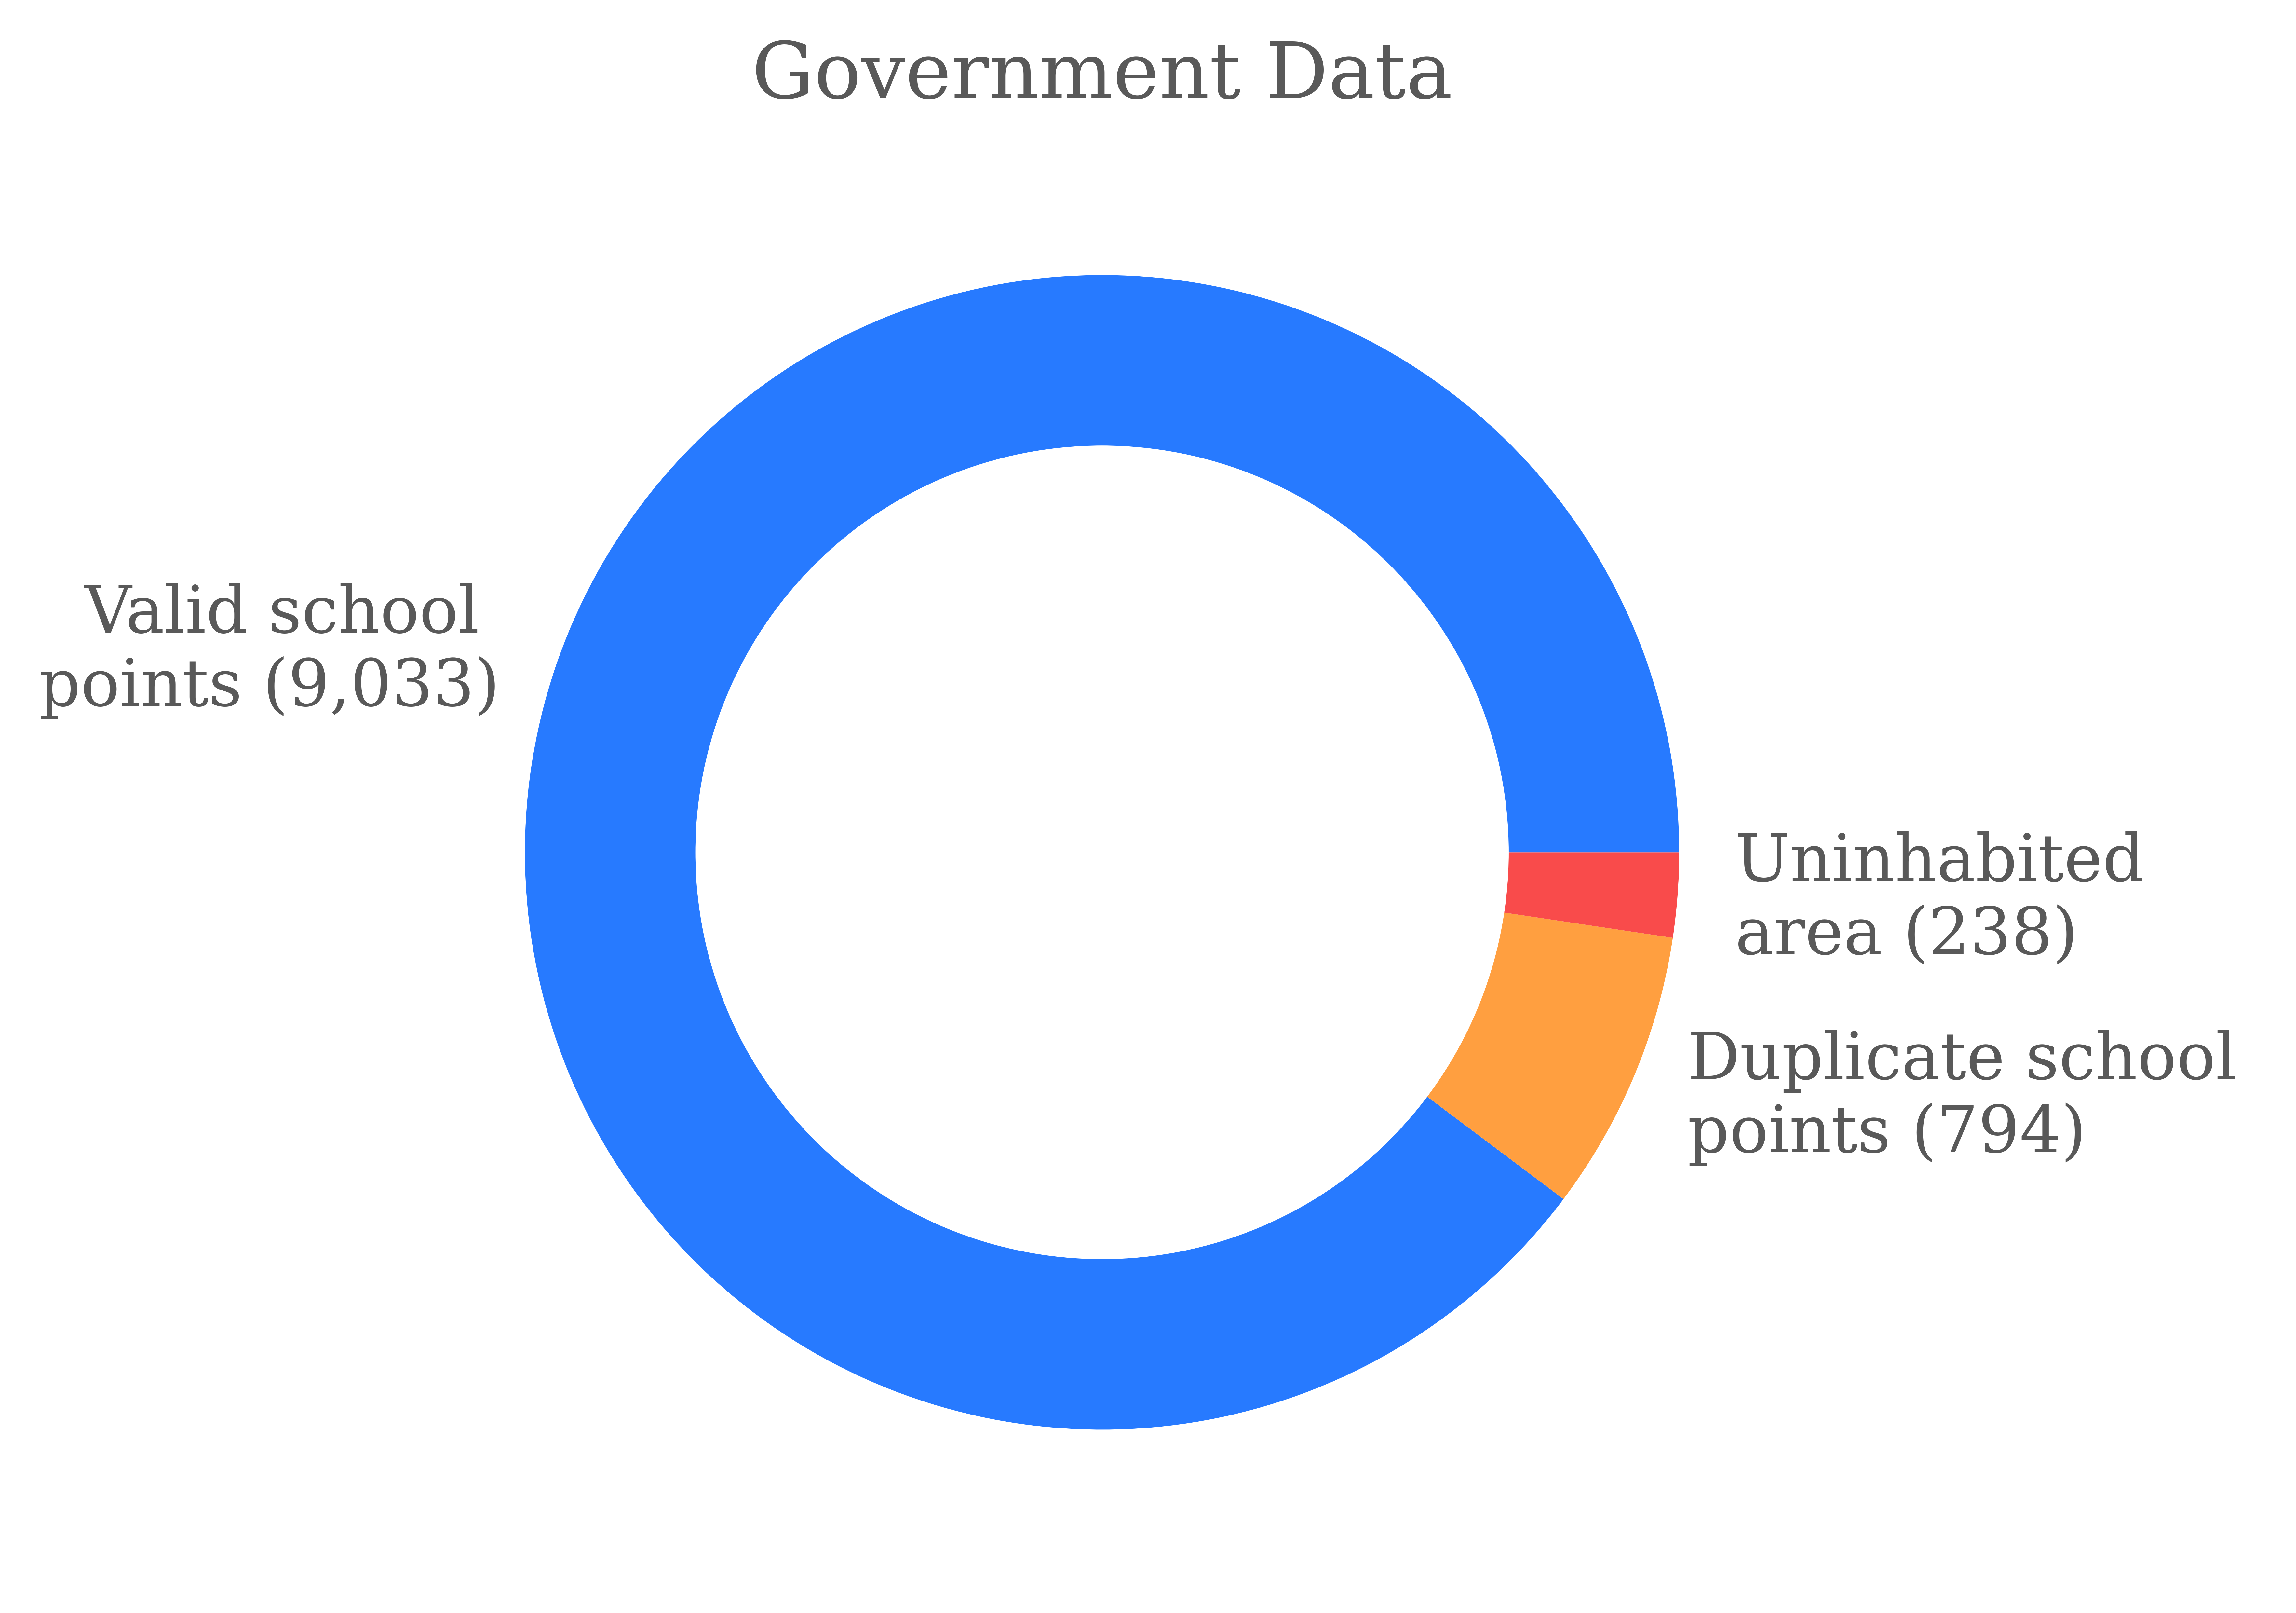

In [11]:
plot_utils.plot_pie_chart(master, source="master")

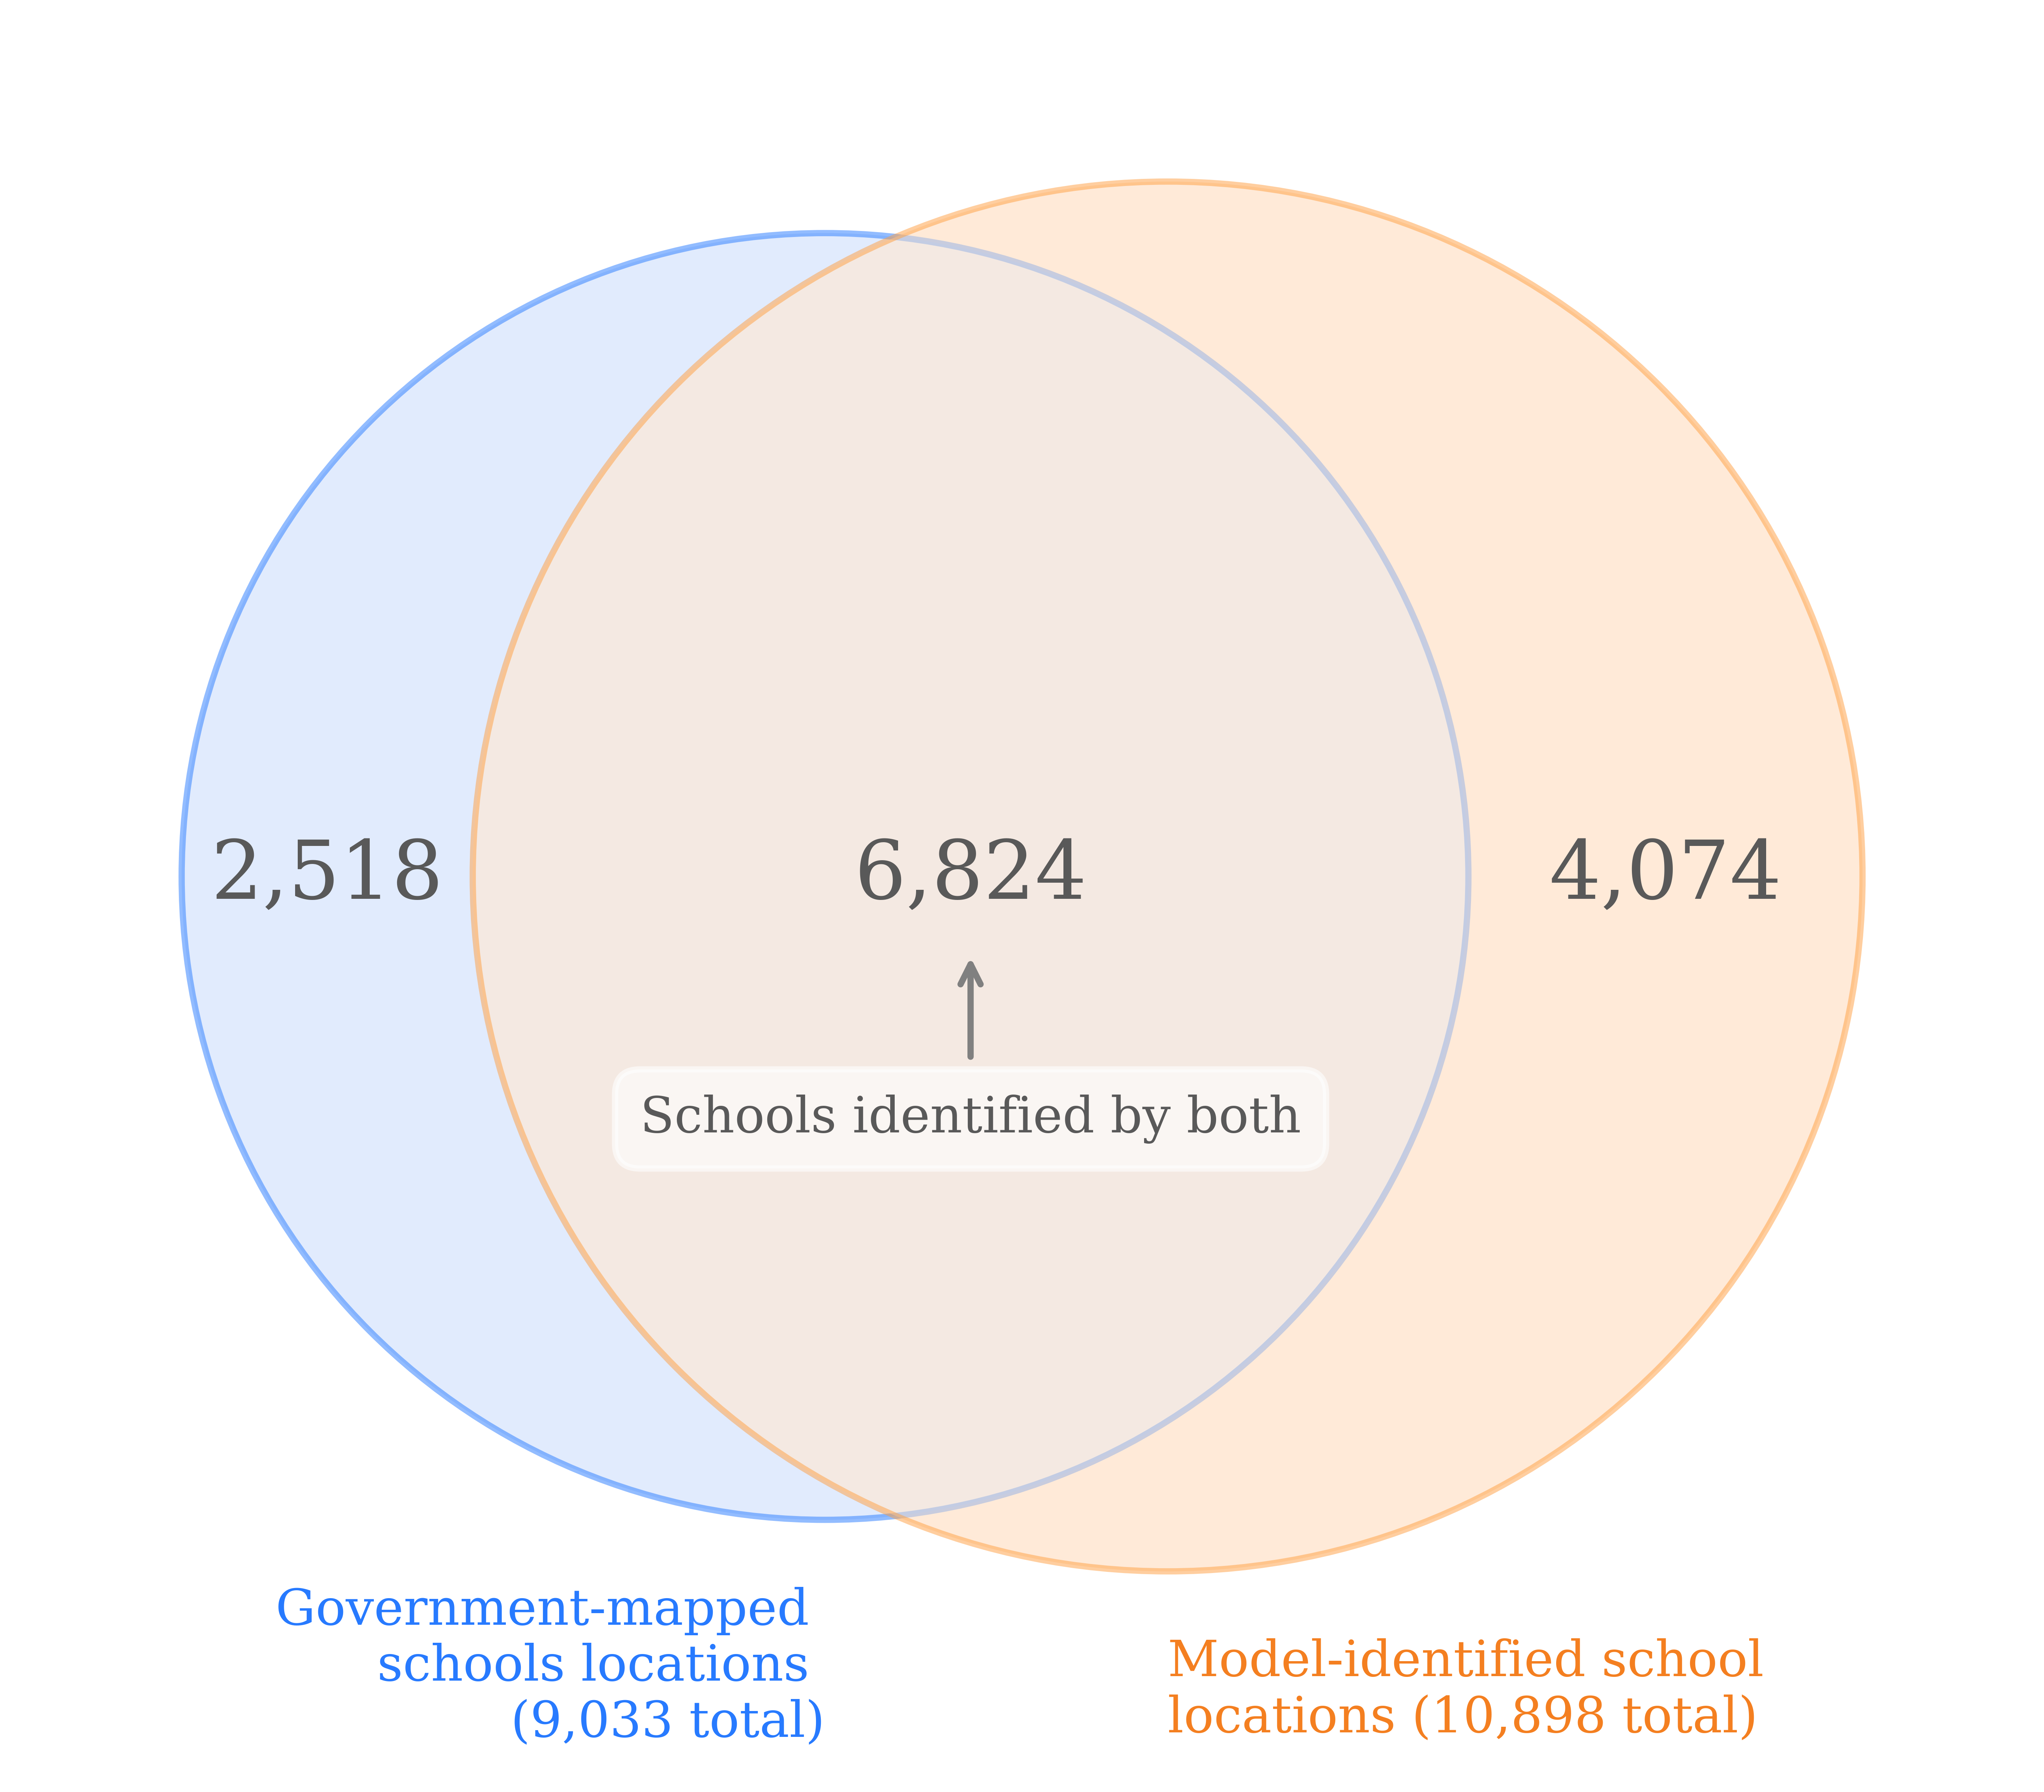

In [16]:
plot_utils.plot_venn_diagram(master, preds[preds.prob_cal > 0.5], threshold_dist=250)

In [17]:
plot_utils.plot_choropleth(master, preds[preds.prob_cal > 0.5], data_config, iso_code, threshold_dist=250)